#Step 1 - Exploratory DATA Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_data = pd.read_excel('/content/drive/MyDrive/Dsw/test_data.xlsx')
test_data = pd.read_excel('/content/drive/MyDrive/Dsw/train_data.xlsx')


**The below all steps will help Ensure data quality and completeness.
Guides preprocessing steps, such as handling missing values or transforming data types.**

In [ ]:
train_data.head()

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,77298290,2016-04-01,C3,36 months,MORTGAGE,690,6,120000.0,13.67,debt_consolidation,20000,Individual,680.36,Not Verified,9248,11,1
1,78339737,2016-04-01,D5,36 months,RENT,700,6,61277.0,19.99,house,9450,Individual,351.15,Verified,1929,0,0
2,76302428,2016-04-01,E1,60 months,RENT,660,5,92000.0,19.99,house,12700,Individual,336.41,Source Verified,7428,3,1
3,74994638,2016-04-01,C4,36 months,MORTGAGE,670,5,150000.0,14.46,small_business,25000,Individual,860.04,Not Verified,7993,3,1
4,76995373,2016-04-01,D4,60 months,MORTGAGE,660,5,68000.0,18.99,credit_card,16000,Individual,414.97,Not Verified,8647,11,1


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8455 entries, 0 to 8454
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          8455 non-null   int64         
 1   transaction_date     8455 non-null   datetime64[ns]
 2   sub_grade            8455 non-null   object        
 3   term                 8455 non-null   object        
 4   home_ownership       8455 non-null   object        
 5   cibil_score          8455 non-null   int64         
 6   total_no_of_acc      8455 non-null   int64         
 7   annual_inc           8455 non-null   float64       
 8   int_rate             8455 non-null   float64       
 9   purpose              8455 non-null   object        
 10  loan_amnt            8455 non-null   int64         
 11  application_type     8455 non-null   object        
 12  installment          8455 non-null   float64       
 13  verification_status  8455 non-nul

In [ ]:
print(train_data.describe())

        customer_id               transaction_date  cibil_score  \
count  8.455000e+03                           8455  8455.000000   
mean   7.882215e+07  2016-04-29 04:48:40.875221760   686.294500   
min    3.476740e+05            2016-04-01 00:00:00   660.000000   
25%    7.703897e+07            2016-04-01 00:00:00   670.000000   
50%    7.834992e+07            2016-05-01 00:00:00   680.000000   
75%    8.068136e+07            2016-06-01 00:00:00   700.000000   
max    8.436346e+07            2016-06-01 00:00:00   825.000000   
std    3.058865e+06                            NaN    24.451172   

       total_no_of_acc    annual_inc     int_rate     loan_amnt  installment  \
count       8455.00000  8.455000e+03  8455.000000   8455.000000  8455.000000   
mean           0.29450  7.244725e+04    17.186235  15538.302779   488.111989   
min            0.00000  1.884000e+03    12.790000   1000.000000    33.600000   
25%            0.00000  4.300000e+04    13.670000   8000.000000   269.520000

In [ ]:
print(train_data.isnull().sum())

customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [ ]:
duplicates = train_data.duplicated().sum()

In [ ]:
print(f"\nNumber of duplicate rows in training data: {duplicates}")


Number of duplicate rows in training data: 0


In [ ]:
for column in train_data.columns:
    print(f"{column}: {train_data[column].nunique()} unique values")


customer_id: 8455 unique values
transaction_date: 3 unique values
sub_grade: 25 unique values
term: 2 unique values
home_ownership: 3 unique values
cibil_score: 34 unique values
total_no_of_acc: 10 unique values
annual_inc: 1361 unique values
int_rate: 53 unique values
purpose: 12 unique values
loan_amnt: 1027 unique values
application_type: 2 unique values
installment: 3964 unique values
verification_status: 3 unique values
account_bal: 7329 unique values
emp_length: 11 unique values
loan_status: 2 unique values


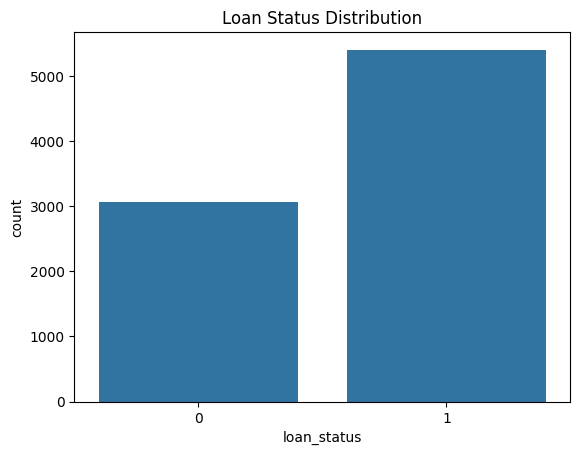

In [ ]:
sns.countplot(x='loan_status', data=train_data)
plt.title('Loan Status Distribution')
plt.show()

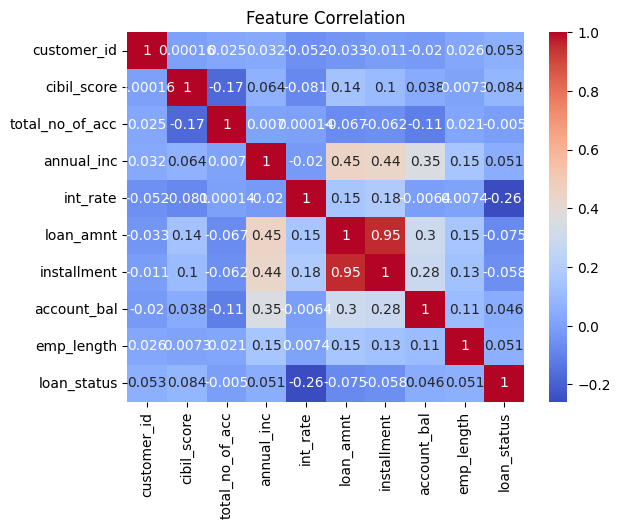

In [ ]:
correlation = train_data.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title('Feature Correlation')
plt.show()

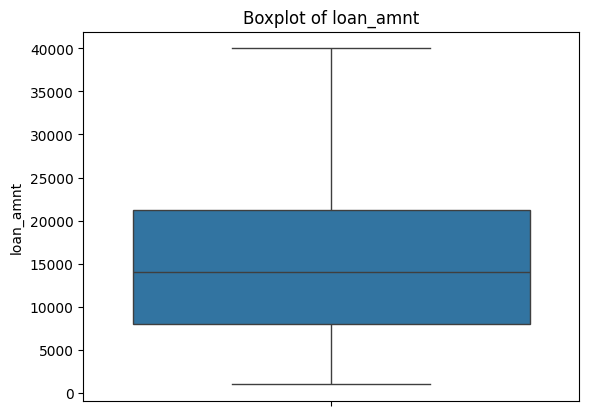

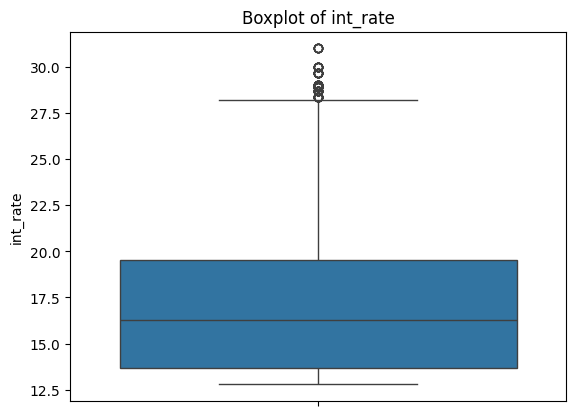

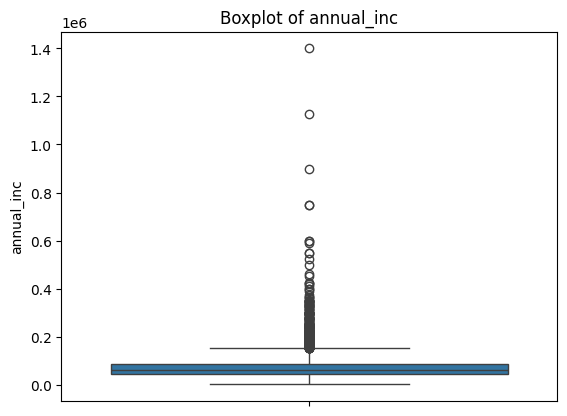

In [ ]:
numerical_features = ['loan_amnt', 'int_rate', 'annual_inc']
for feature in numerical_features:
    sns.boxplot(y=train_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

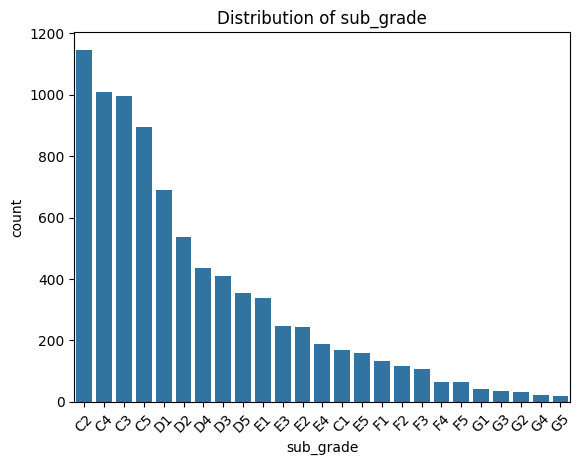

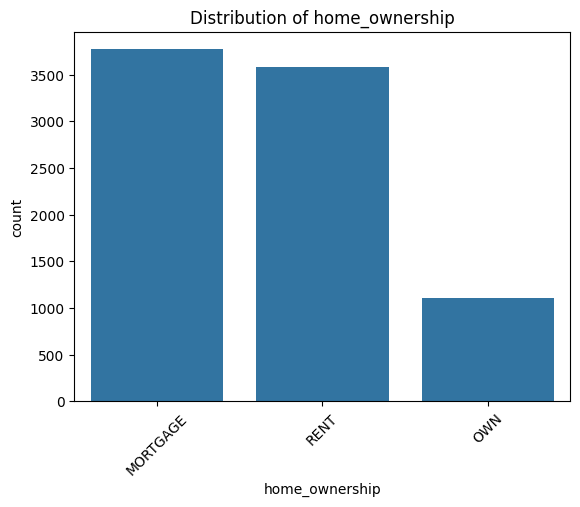

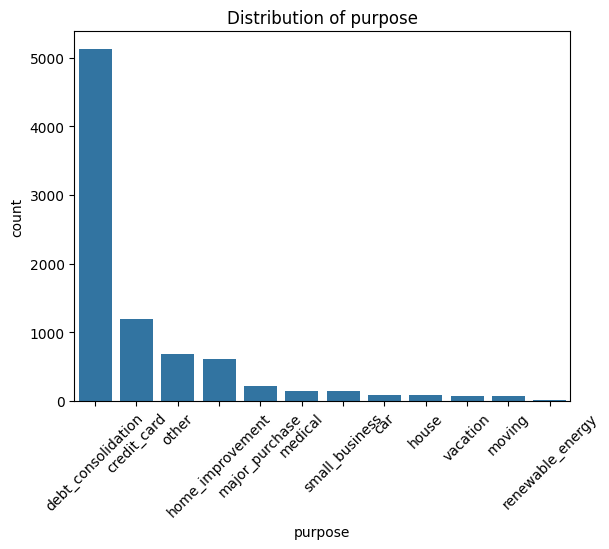

In [ ]:
categorical_features = ['sub_grade', 'home_ownership', 'purpose']
for feature in categorical_features:
    sns.countplot(x=feature, data=train_data, order=train_data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

**Feature** **Engineering**

In [ ]:
print(train_data.columns)


Index(['customer_id', 'sub_grade', 'term', 'home_ownership', 'cibil_score',
       'total_no_of_acc', 'annual_inc', 'int_rate', 'purpose', 'loan_amnt',
       'application_type', 'installment', 'verification_status', 'account_bal',
       'emp_length', 'loan_status', 'transaction_month', 'transaction_year'],
      dtype='object')
Index(['customer_id', 'sub_grade', 'term', 'home_ownership', 'cibil_score',
       'total_no_of_acc', 'annual_inc', 'int_rate', 'purpose', 'loan_amnt',
       'application_type', 'installment', 'verification_status', 'account_bal',
       'emp_length', 'loan_status', 'transaction_month', 'transaction_year'],
      dtype='object')


In [ ]:
train_data.head()

,customer_id,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status,transaction_month,transaction_year
0,77298290,C3,36 months,MORTGAGE,690,6,120000.0,13.67,debt_consolidation,20000,Individual,680.36,Not Verified,9248,11,1,4,2016
1,78339737,D5,36 months,RENT,700,6,61277.0,19.99,house,9450,Individual,351.15,Verified,1929,0,0,4,2016
2,76302428,E1,60 months,RENT,660,5,92000.0,19.99,house,12700,Individual,336.41,Source Verified,7428,3,1,4,2016
3,74994638,C4,36 months,MORTGAGE,670,5,150000.0,14.46,small_business,25000,Individual,860.04,Not Verified,7993,3,1,4,2016
4,76995373,D4,60 months,MORTGAGE,660,5,68000.0,18.99,credit_card,16000,Individual,414.97,Not Verified,8647,11,1,4,2016


In [ ]:
print(test_data.columns)

Index(['customer_id', 'sub_grade', 'term', 'home_ownership', 'cibil_score',
       'total_no_of_acc', 'annual_inc', 'int_rate', 'purpose', 'loan_amnt',
       'application_type', 'installment', 'verification_status', 'account_bal',
       'emp_length', 'loan_status', 'transaction_month', 'transaction_year'],
      dtype='object')


In [ ]:
#Bin `int_rate` into ranges
def bin_interest_rate(df, rate_col):
    bins = [0, 10, 15, 20, 30]  # Define ranges (e.g., 0-10%, 10-15%, etc.)
    labels = ['Low', 'Medium', 'High', 'Very High']  # Label each bin
    df[f'{rate_col}_binned'] = pd.cut(df[rate_col], bins=bins, labels=labels, include_lowest=True)
    df.drop(columns=[rate_col], inplace=True)  # Optionally drop original column
    return df

if 'int_rate' in train_data.columns:
    train_data = bin_interest_rate(train_data, 'int_rate')
    test_data = bin_interest_rate(test_data, 'int_rate')



In [ ]:
train_data.head()

,customer_id,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status,transaction_month,transaction_year
0,77298290,C3,36 months,MORTGAGE,690,6,120000.0,13.67,debt_consolidation,20000,Individual,680.36,Not Verified,9248,11,1,4,2016
1,78339737,D5,36 months,RENT,700,6,61277.0,19.99,house,9450,Individual,351.15,Verified,1929,0,0,4,2016
2,76302428,E1,60 months,RENT,660,5,92000.0,19.99,house,12700,Individual,336.41,Source Verified,7428,3,1,4,2016
3,74994638,C4,36 months,MORTGAGE,670,5,150000.0,14.46,small_business,25000,Individual,860.04,Not Verified,7993,3,1,4,2016
4,76995373,D4,60 months,MORTGAGE,660,5,68000.0,18.99,credit_card,16000,Individual,414.97,Not Verified,8647,11,1,4,2016


In [ ]:
# 3. Encode categorical features for modeling
categorical_features = ['sub_grade', 'term', 'home_ownership', 'purpose',
                        'application_type', 'verification_status', 'int_rate_binned']

def encode_categorical(df, cat_features):
    return pd.get_dummies(df, columns=cat_features, drop_first=True)

# Verify that categorical features exist before encoding
available_categorical_features = [feature for feature in categorical_features if feature in train_data.columns]
train_data = encode_categorical(train_data, available_categorical_features)
test_data = encode_categorical(test_data, available_categorical_features)

In [ ]:
train_data.head()

,customer_id,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status,transaction_month,transaction_year
0,77298290,C3,36 months,MORTGAGE,690,6,120000.0,13.67,debt_consolidation,20000,Individual,680.36,Not Verified,9248,11,1,4,2016
1,78339737,D5,36 months,RENT,700,6,61277.0,19.99,house,9450,Individual,351.15,Verified,1929,0,0,4,2016
2,76302428,E1,60 months,RENT,660,5,92000.0,19.99,house,12700,Individual,336.41,Source Verified,7428,3,1,4,2016
3,74994638,C4,36 months,MORTGAGE,670,5,150000.0,14.46,small_business,25000,Individual,860.04,Not Verified,7993,3,1,4,2016
4,76995373,D4,60 months,MORTGAGE,660,5,68000.0,18.99,credit_card,16000,Individual,414.97,Not Verified,8647,11,1,4,2016


In [ ]:
# 4. Ensure the test set has the same columns as the train set
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[train_data.columns]

In [ ]:
# Display transformed data
print("Train Data after Feature Engineering:")
print(train_data.head())
print("\nTest Data after Feature Engineering:")
print(test_data.head())

Train Data after Feature Engineering:
   customer_id  cibil_score  total_no_of_acc  annual_inc  loan_amnt  \
0     77298290          690                6    120000.0      20000   
1     78339737          700                6     61277.0       9450   
2     76302428          660                5     92000.0      12700   
3     74994638          670                5    150000.0      25000   
4     76995373          660                5     68000.0      16000   

   installment  account_bal  emp_length  loan_status  transaction_month  ...  \
0       680.36         9248          11            1                  4  ...   
1       351.15         1929           0            0                  4  ...   
2       336.41         7428           3            1                  4  ...   
3       860.04         7993           3            1                  4  ...   
4       414.97         8647          11            1                  4  ...   

   purpose_other  purpose_renewable_energy  purpose_sm

In [ ]:
train_data.head()

,customer_id,cibil_score,total_no_of_acc,annual_inc,loan_amnt,installment,account_bal,emp_length,loan_status,transaction_month,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,application_type_Joint App,verification_status_Source Verified,verification_status_Verified,int_rate_binned_Medium,int_rate_binned_High,int_rate_binned_Very High
0,77298290,690,6,120000.0,20000,680.36,9248,11,1,4,...,False,False,False,False,False,False,False,True,False,False
1,78339737,700,6,61277.0,9450,351.15,1929,0,0,4,...,False,False,False,False,False,False,True,False,True,False
2,76302428,660,5,92000.0,12700,336.41,7428,3,1,4,...,False,False,False,False,False,True,False,False,True,False
3,74994638,670,5,150000.0,25000,860.04,7993,3,1,4,...,False,False,True,False,False,False,False,True,False,False
4,76995373,660,5,68000.0,16000,414.97,8647,11,1,4,...,False,False,False,False,False,False,False,False,True,False


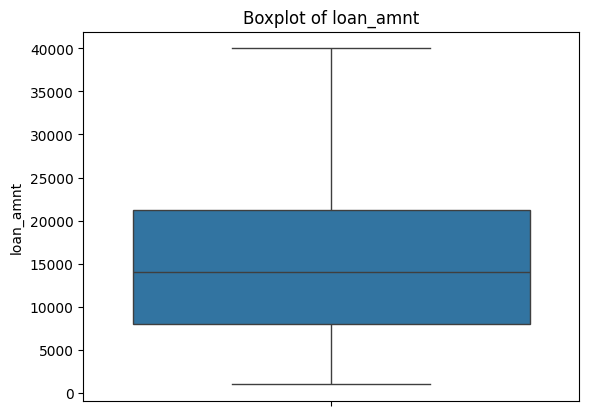

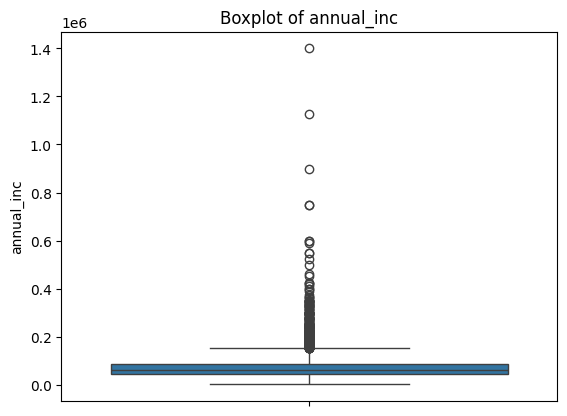

Feature '	int_rate_binned_Medium' not found in the DataFrame.


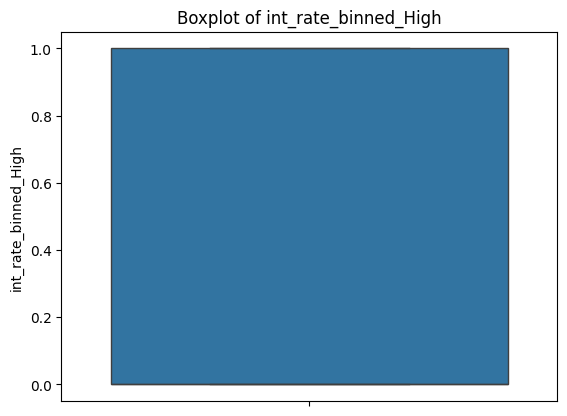

Feature 'int_rate_binned_Very Highint_rate_binned' not found in the DataFrame.


In [ ]:
numerical_features = ['loan_amnt', 'annual_inc', '	int_rate_binned_Medium',	'int_rate_binned_High',	'int_rate_binned_Very Highint_rate_binned'] # Updated line to use the binned column.
for feature in numerical_features:
    if feature in train_data.columns:
        sns.boxplot(y=train_data[feature])
        plt.title(f'Boxplot of {feature}')
        plt.show()
    else:
        print(f"Feature '{feature}' not found in the DataFrame.")

In [ ]:
import pandas as pd
numerical_columns = ['cibil_score', 'annual_inc', 'loan_amnt', 'installment', 'account_bal']

def remove_outliers_iqr(data, columns):
    for column in columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')  

        data = data.dropna(subset=[column])

        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)

        
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

train_data_cleaned = remove_outliers_iqr(train_data, numerical_columns)
test_data_cleaned = remove_outliers_iqr(test_data, numerical_columns)

print(f"Original Train Data Size: {len(train_data)}")
print(f"Cleaned Train Data Size: {len(train_data_cleaned)}")
print(f"Original Test Data Size: {len(test_data)}")
print(f"Cleaned Test Data Size: {len(test_data_cleaned)}")


Original Train Data Size: 8455
Cleaned Train Data Size: 7086
Original Test Data Size: 113705
Cleaned Test Data Size: 96696


#Step 2 - **MODELING**

In [ ]:
# model.py

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import pandas as pd

class LoanDefaultModel:
    def __init__(self, model):
        self.model = model

    def load(self, data):
        # Load the dataset
        self.data = data

    def preprocess(self):
        # Drop irrelevant columns
        X = self.data.drop(['loan_status', 'customer_id', 'transaction_month', 'transaction_year'], axis=1)
        y = self.data['loan_status']

        # Splitting the data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        # Preprocessing pipeline for numerical and categorical features
        num_features = X.select_dtypes(include=['float64', 'int64']).columns
        cat_features = X.select_dtypes(include=['object']).columns

        # Defining transformers for numerical and categorical data
        num_transformer = StandardScaler()  # Standardizing numerical features
        cat_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encoding categorical features

        # Combining both transformations using a ColumnTransformer
        self.preprocessor = ColumnTransformer(
            transformers=[('num', num_transformer, num_features),
                          ('cat', cat_transformer, cat_features)]
        )

        # Applying transformations to training and validation sets
        X_train = self.preprocessor.fit_transform(X_train)
        X_val = self.preprocessor.transform(X_val)

        # Storing transformed data for later use
        self.X_train, self.X_val, self.y_train, self.y_val = X_train, X_val, y_train, y_val

    def train(self):
        # Training the model
        self.model.fit(self.X_train, self.y_train)

    def test(self):
        # Making predictions and evaluating the model
        predictions = self.model.predict(self.X_val)
        print(f"Classification Report:\n{classification_report(self.y_val, predictions)}")
        print(f"Accuracy: {accuracy_score(self.y_val, predictions):.2f}")

    def predict(self, new_data):
        # Predicting on new data using the trained model
        new_data = self.preprocessor.transform(new_data)
        return self.model.predict(new_data)

# Initialize models
logistic_model = LoanDefaultModel(LogisticRegression())
random_forest_model = LoanDefaultModel(RandomForestClassifier())
decision_tree_model = LoanDefaultModel(DecisionTreeClassifier())
xgboost_model = LoanDefaultModel(xgb.XGBClassifier())
lightgbm_model = LoanDefaultModel(lgb.LGBMClassifier())
svm_model = LoanDefaultModel(SVC())
mlp_model = LoanDefaultModel(MLPClassifier())


# Remove outliers (if not already done before calling this script)
numerical_columns = ['cibil_score', 'annual_inc', 'loan_amnt', 'installment', 'account_bal']
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

train_data_cleaned = remove_outliers_iqr(train_data, numerical_columns)
test_data_cleaned = remove_outliers_iqr(test_data, numerical_columns)

# Load data into the model
logistic_model.load(train_data_cleaned)
random_forest_model.load(train_data_cleaned)
decision_tree_model.load(train_data_cleaned)
xgboost_model.load(train_data_cleaned)
lightgbm_model.load(train_data_cleaned)
svm_model.load(train_data_cleaned)
mlp_model.load(train_data_cleaned)

# Preprocess the data (this will also split the dataset into training and validation sets)
logistic_model.preprocess()
random_forest_model.preprocess()
decision_tree_model.preprocess()
xgboost_model.preprocess()
lightgbm_model.preprocess()
svm_model.preprocess()
mlp_model.preprocess()

# Train the models
logistic_model.train()
random_forest_model.train()
decision_tree_model.train()
xgboost_model.train()
lightgbm_model.train()
svm_model.train()
mlp_model.train()

# Evaluate the models
print("Logistic Regression Model Evaluation:")
logistic_model.test()

print("Random Forest Classifier Evaluation:")
random_forest_model.test()

print("Decision Tree Classifier Evaluation:")
decision_tree_model.test()

print("XGBoost Classifier Evaluation:")
xgboost_model.test()

print("LightGBM Classifier Evaluation:")
lightgbm_model.test()

print("SVM Classifier Evaluation:")
svm_model.test()

print("MLP Classifier Evaluation:")
mlp_model.test()

# Predict using the test data (remove unnecessary columns from test data)
test_data_cleaned = test_data_cleaned.drop(['loan_status', 'customer_id', 'transaction_month', 'transaction_year'], axis=1)

logistic_predictions = logistic_model.predict(test_data_cleaned)
random_forest_predictions = random_forest_model.predict(test_data_cleaned)
decision_tree_predictions = decision_tree_model.predict(test_data_cleaned)
xgboost_predictions = xgboost_model.predict(test_data_cleaned)
lightgbm_predictions = lightgbm_model.predict(test_data_cleaned)
svm_predictions = svm_model.predict(test_data_cleaned)
mlp_predictions = mlp_model.predict(test_data_cleaned)


[LightGBM] [Info] Number of positive: 3535, number of negative: 2133
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1053
[LightGBM] [Info] Number of data points in the train set: 5668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623677 -> initscore=0.505184
[LightGBM] [Info] Start training from score 0.505184


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Logistic Regression Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.17      0.25       511
           1       0.66      0.91      0.77       907

    accuracy                           0.64      1418
   macro avg       0.59      0.54      0.51      1418
weighted avg       0.61      0.64      0.58      1418

Accuracy: 0.64
Random Forest Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.30      0.37       511
           1       0.68      0.82      0.74       907

    accuracy                           0.63      1418
   macro avg       0.58      0.56      0.56      1418
weighted avg       0.61      0.63      0.61      1418

Accuracy: 0.63
Decision Tree Classifier Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43       511
           1       0.68   

In [ ]:
# Save the cleaned train and test datasets as CSV files
train_data.to_csv('train_data_cleaned.csv', index=False)
test_data.to_csv('test_data_cleaned.csv', index=False)
